In [62]:
import sys
sys.path.append("D:/MSc_Arbeit/model_comparison_codes")
import importlib
importlib.reload(read_ukmo)
import read_in_arome
import read_icon_model_3D
import read_ukmo
import confg
import dask
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from colorspace import diverging_hcl
import tarfile

In [3]:
icon15 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756, 
                                                                              lat = 47.266076, variant = "ICON") 
icon16 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON")

In [4]:
variables = ["temperature", "pressure", "temp", "pres", "u", "v", "w", "z_ifc"]
icon = xr.concat([icon15[variables], icon16[variables]], dim = "time")

In [5]:
icon

<xarray.Dataset> Size: 75kB
Dimensions:      (time: 25, height: 90, height_2: 91, height_3: 91)
Coordinates:
    clon         float32 4B 0.1989
    clat         float32 4B 0.825
  * height       (height) float64 720B 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * height_2     (height_2) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3     (height_3) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * time         (time) datetime64[ns] 200B 2017-10-15T12:00:00 ... 2017-10-1...
Data variables:
    temperature  (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    pressure     (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    temp         (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    pres         (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    u            (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    v            (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    w            (time, height_2) float32 9kB dask.array<chunksize=(1, 91), meta=np.ndarray>
    z_ifc        (time, height_3) float32 9kB dask.array<chunksize=(1, 91), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          655488b8-6e60-ac09-a653-9b1ce37a2b20
    uuidOfVGrid:          5210aca5-6684-c009-3731-0a31182a3180
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@1638fcbef3269d...
    history:              /work/bb1096/b380910/models/icon/icon-nwp_2TE//bin/...
    references:           see MPIM/DWD publications
    comment:              Julian Quimbayo-Duarte (b380910) on l30537 (Linux 4...

In [72]:
icon15_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")
icon16_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")

In [73]:
variables = ["temperature", "pressure", "temp", "pres", "u", "v", "w"]
icon2te = xr.concat([icon15_2te[variables], icon16_2te[variables]], dim = "time")

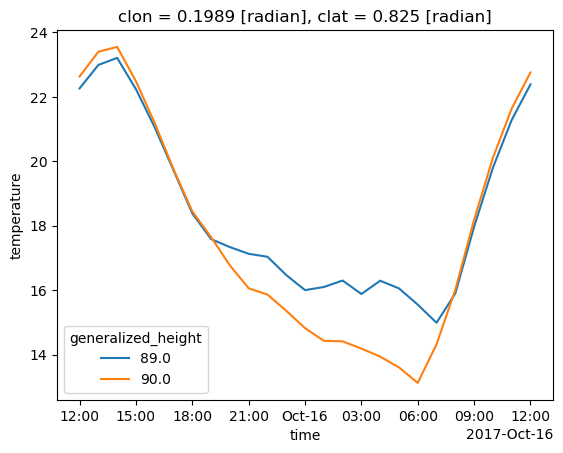

In [56]:
icon.temperature.isel(height = np.arange(88, 90)).plot.line(x="time")

In [6]:
pal1 = diverging_hcl(palette = "Blue-Red 2")

In [ ]:
icon.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "z_ifc", figsize=(10, 6), 
                                                       cmap = pal1.cmap())
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

## Icon2TE

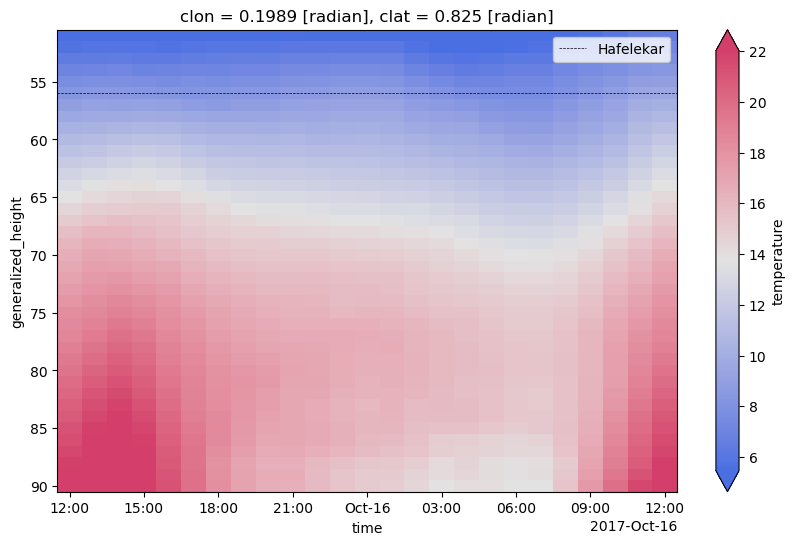

In [113]:
icon2te.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "height", figsize=(10, 6), 
                                                          cmap = pal1.cmap())
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

## AROME

In [3]:
arome = read_arome.read_in_arome(time=all, method='sel', lon=11.384167, lat=47.259998);
arome

Your selected method is sel
[[  604.0626  3191.4956  4343.409  ... 95455.516  95593.64   95715.29  ]
 [  604.0626  3191.4956  4343.409  ... 95091.37   95229.04   95350.164 ]
 [  604.0626  3191.4956  4343.409  ... 95056.92   95194.586  95316.7   ]
 ...
 [  604.0626  3191.4956  4343.409  ... 95159.84   95297.56   95418.734 ]
 [  604.0626  3191.4956  4343.409  ... 95141.25   95278.97   95400.14  ]
 [  604.0626  3191.4956  4343.409  ... 95114.16   95251.875  95373.04  ]]


Magnitude,[[604.0626220703125 3191.49560546875 4343.4091796875 ... 95455.515625 95593.640625 95715.2890625] [604.0626220703125 3191.49560546875 4343.4091796875 ... 95091.3671875 95229.0390625 95350.1640625] [604.0626220703125 3191.49560546875 4343.4091796875 ... 95056.921875 95194.5859375 95316.703125] ... [604.0626220703125 3191.49560546875 4343.4091796875 ... 95159.84375 95297.5625 95418.734375] [604.0626220703125 3191.49560546875 4343.4091796875 ... 95141.25 95278.96875 95400.140625] [604.0626220703125 3191.49560546875 4343.4091796875 ... 95114.15625 95251.875 95373.0390625]]
Units,pascal
Magnitude,[11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836 11.385000228881836]
Units,dimensionless
Magnitude,[47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234 47.255001068115234]
Units,dimensionless
Magnitude,[[1.0 2.0 3.0 ... 88.0 89.0 90.0] [1.0 2.0 3.0 ... 88.0 89.0 90.0] [1.0 2.0 3.0 ... 88.0 89.0 90.0] ... [1.0 2.0 3.0 ... 88.0 89.0 90.0] [1.0 2.0 3.0 ... 88.0 89.0 90.0] [1.0 2.0 3.0 ... 88.0 89.0 90.0]]
Units,dimensionless
Magnitude,[[3.0404235076275654e-06 3.0727069315616973e-06 2.928372850874439e-06 ... 0.006671760696917772 0.006748444400727749 0.006805440876632929] [3.0494265956804156e-06 3.0576347853639163e-06 2.925552507804241e-06 ... 0.006631912663578987 0.006741492077708244 0.006907403469085693] [3.076945176871959e-06 3.0530272852047347e-06 2.9287866709637456e-06 ... 0.00695790583267808 0.007126571610569954 0.007360541261732578] ... [3.474100594758056e-06 3.053394721064251e-06 2.941465936601162e-06 ... 0.005044637713581324 0.005119511391967535 0.005290281027555466] [3.43013925885316e-06 3.0473438528133556e-06 2.942775608971715e-06 ... 0.005125368945300579 0.005202587693929672 0.00537567725405097] [3.3971764423768036e-06 3.0553756005247124e-06 2.945198502857238e-06 ... 0.0052278973162174225 0.005316484719514847 0.0054981401190161705]]
Units,dimensionless
Magnitude,[[991.3232421875 565.8681640625 514.617431640625 ... 301.84521484375 301.980224609375 302.044189453125] [988.3369140625 565.124755859375 512.337890625 ... 301.58935546875 301.619140625 301.66162109375] [991.366943359375 567.087890625 513.343505859375 ... 301.535888671875 301.591064453125 301.69189453125] ... [983.1962890625 569.9580078125 513.036865234375 ... 296.92016601562

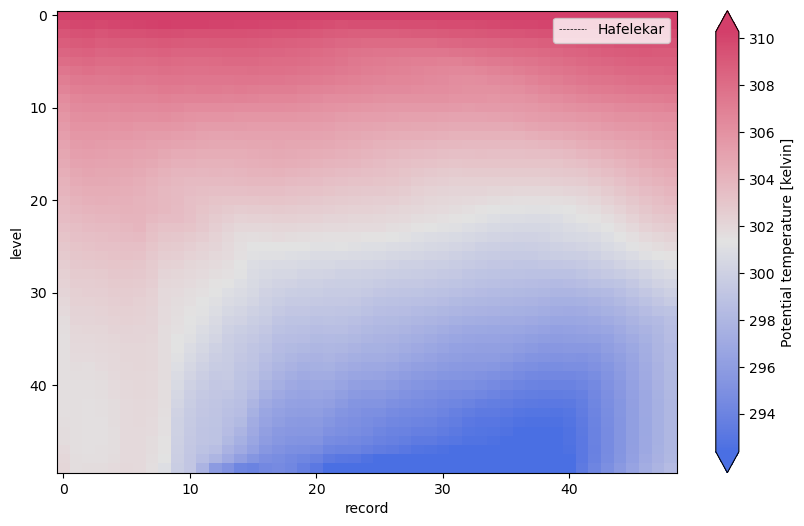

In [166]:
arome.th.isel(level = np.arange(40, 90)).plot(robust=True, x = "record", y = "level", figsize=(10, 6), 
                                                          cmap = pal1.cmap())
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

In [6]:
arome = read_arome.read_timeSeries_AROME(location="IAO")  

FileNotFoundError: No files found for location IAO

In [8]:
arome = xr.open_dataset(confg.model_folder + "AROME/AROME_TEAMx_CAP_Quicklooks.tar.gz", engine = "netcdf4")

OSError: [Errno -51] NetCDF: Unknown file format: 'D:\\MSc_Arbeit\\AROME\\AROME_TEAMx_CAP_Quicklooks.tar.gz'

In [11]:
with tarfile.open(confg.model_folder + "AROME/AROME_TEAMx_CAP_Quicklooks.tar.gz", "r:gz") as tar:
    for member in tar.getmembers():
         f = tar.extractfile(member)
         if f is not None:
             content = f.read()

In [16]:
print(tar)

# UKMO

In [63]:
um = read_ukmo.read_ukmo_fixed_point_and_time(city_name=None, time="2017-10-15T14:00:00", lon=11.384167, lat=47.259998)

D:\MSc_Arbeit/model_comparison_codes\read_ukmo.py:38: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dat = xr.open_dataset(f"{ukmo_folder}/MetUM_MetOffice_20171015T1200Z_CAP02_3D_30min_1km_optimal_v.nc")


TypeError: objects must be an iterable containing only Dataset(s), DataArray(s), and dictionaries.

In [53]:
um

<xarray.Dataset> Size: 24GB
Dimensions:                     (time: 50, model_level_number: 70,
                                 grid_latitude: 490, grid_longitude: 890,
                                 bnds: 2)
Coordinates:
  * time                        (time) datetime64[ns] 400B 2017-10-15T12:00:0...
  * model_level_number          (model_level_number) int32 280B 1 2 3 ... 69 70
  * grid_latitude               (grid_latitude) float32 2kB -2.205 ... 2.196
  * grid_longitude              (grid_longitude) float64 7kB 356.0 ... 364.0
    forecast_period             (time) timedelta64[ns] 400B dask.array<chunksize=(50,), meta=np.ndarray>
    forecast_reference_time     datetime64[ns] 8B ...
    level_height                (model_level_number) float32 280B dask.array<chunksize=(70,), meta=np.ndarray>
    sigma                       (model_level_number) float32 280B dask.array<chunksize=(70,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    air_potential_temperature   (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    rotated_latitude_longitude  int32 4B ...
    level_height_bnds           (model_level_number, bnds) float32 560B dask.array<chunksize=(70, 2), meta=np.ndarray>
    sigma_bnds                  (model_level_number, bnds) float32 560B dask.array<chunksize=(70, 2), meta=np.ndarray>
    air_pressure                (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    specific_humidity           (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    geopotential_height         (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    regular_longitude           (grid_latitude, grid_longitude) float64 3MB 5...
    regular_latitude            (grid_latitude, grid_longitude) float64 3MB 4...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   12.0
    Conventions:  CF-1.7

In [54]:
um.regular_latitude

<xarray.DataArray 'regular_latitude' (grid_latitude: 490, grid_longitude: 890)> Size: 3MB
array([[44.94962962, 44.95028115, 44.95093122, ..., 44.95158057,
        44.95093195, 44.95028188],
       [44.95860598, 44.95925762, 44.95990779, ..., 44.96055724,
        44.95990852, 44.95925835],
       [44.96758209, 44.96823383, 44.96888412, ..., 44.96953367,
        44.96888485, 44.96823456],
       ...,
       [49.32010763, 49.32081504, 49.32152087, ..., 49.32222591,
        49.32152166, 49.32081583],
       [49.3290795 , 49.32978703, 49.33049299, ..., 49.33119816,
        49.33049378, 49.32978783],
       [49.33805184, 49.3387595 , 49.33946558, ..., 49.34017087,
        49.33946637, 49.33876029]])
Coordinates:
  * grid_latitude            (grid_latitude) float32 2kB -2.205 -2.196 ... 2.196
  * grid_longitude           (grid_longitude) float64 7kB 356.0 356.0 ... 364.0
    forecast_reference_time  datetime64[ns] 8B ...

In [40]:
variables = ["z", "th", "q", "p"]
um_files = [confg.ukmo_folder + "/MetUM_MetOffice_20171015T1200Z_CAP02_3D_30min_1km_optimal_" + var + ".nc"
                for var in variables]
um = xr.open_mfdataset(um_files, combine='by_coords', compat='override', decode_timedelta=True)

In [44]:
um

<xarray.Dataset> Size: 24GB
Dimensions:                     (time: 50, model_level_number: 70,
                                 grid_latitude: 490, grid_longitude: 890,
                                 bnds: 2)
Coordinates:
  * time                        (time) datetime64[ns] 400B 2017-10-15T12:00:0...
  * model_level_number          (model_level_number) int32 280B 1 2 3 ... 69 70
  * grid_latitude               (grid_latitude) float32 2kB -2.205 ... 2.196
  * grid_longitude              (grid_longitude) float64 7kB 356.0 ... 364.0
    forecast_period             (time) timedelta64[ns] 400B dask.array<chunksize=(50,), meta=np.ndarray>
    forecast_reference_time     datetime64[ns] 8B ...
    level_height                (model_level_number) float32 280B dask.array<chunksize=(70,), meta=np.ndarray>
    sigma                       (model_level_number) float32 280B dask.array<chunksize=(70,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    geopotential_height         (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    rotated_latitude_longitude  int32 4B ...
    level_height_bnds           (model_level_number, bnds) float32 560B dask.array<chunksize=(70, 2), meta=np.ndarray>
    sigma_bnds                  (model_level_number, bnds) float32 560B dask.array<chunksize=(70, 2), meta=np.ndarray>
    air_potential_temperature   (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    specific_humidity           (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
    air_pressure                (time, model_level_number, grid_latitude, grid_longitude) float32 6GB dask.array<chunksize=(50, 70, 490, 890), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   12.0
    Conventions:  CF-1.7

In [45]:
xi, yi = read_ukmo.get_rotated_index_of_lat_lon(latitude=lat, longitude=lon)

NameError: name 'lat' is not defined